<a href="https://colab.research.google.com/github/yahyaaleem/Object-Classification-Using-Tensorflow-Lite/blob/main/TF_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install required package
!pip install tflite-model-maker

     |████████████████████████████████| 501kB 20.5MB/s 
     |████████████████████████████████| 1.2MB 51.5MB/s 
     |████████████████████████████████| 5.5MB 49.2MB/s 
     |████████████████████████████████| 645kB 45.3MB/s 
     |████████████████████████████████| 112kB 56.6MB/s 
     |████████████████████████████████| 706kB 50.4MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 1.0MB 44.9MB/s 
     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 849kB 46.8MB/s 
     |████████████████████████████████| 174kB 57.6MB/s 
     |████████████████████████████████| 122kB 45.7MB/s 
     |████████████████████████████████| 194kB 62.3MB/s 
     |████████████████████████████████| 37.6MB 78kB/s 
     |████████████████████████████████| 102kB 15.6MB/s 
     |████████████████████████████████| 358kB 53.4MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=fba5cce6349207056c965

In [ ]:
#import required packages

import os
import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('2')
from tensorflow import keras
from tflite_model_maker import configs
from tflite_model_maker import ExportFormat
from tflite_model_maker import image_classifier
from tflite_model_maker import ImageClassifierDataLoader
from tflite_model_maker import model_spec
import keras
import matplotlib.pyplot as plt

In [ ]:
#Mount the google drive
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
#defining path
APP_FOLDER = '/content/gdrive/MyDrive/Deep Learning Compressed'

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(APP_FOLDER):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1


print('Total number of files',totalFiles)


Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Backpack
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Bowl
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Cereal Box
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Chair
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Joysticks
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Pens
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Phone
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Shoe
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Watch
Searching in :  /content/gdrive/MyDrive/Deep Learning Compressed/Bottles
Total number of files 691


In [ ]:
#Loading and Splitting data
data = ImageClassifierDataLoader.from_folder('/content/gdrive/MyDrive/Deep Learning Compressed')
train_data, validation_data = data.split(0.6)

INFO:tensorflow:Load image with size: 691, num_label: 10, labels: Backpack, Bottles, Bowl, Cereal Box, Chair, Joysticks, Pens, Phone, Shoe, Watch.


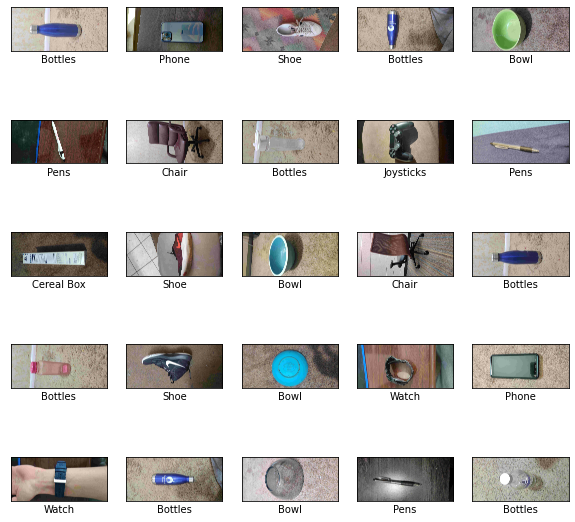

In [ ]:
#Test print 25 images
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [ ]:
#Creating model
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 3,425,834
Trainable params: 12,810
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
12/12 [==============================] - 203s 15s/step - loss: 2.4295 - accuracy: 0.1617 - val_loss: 1.5457 - val_accuracy: 0.7109
Epoch 2/5
12/12 [==============================] - 127s 12s/step - loss: 1.2782 - accuracy: 0.7821 - val_loss: 0.8367 - val_accuracy: 0.9531
Epoch 3/5
12/12 [==========================

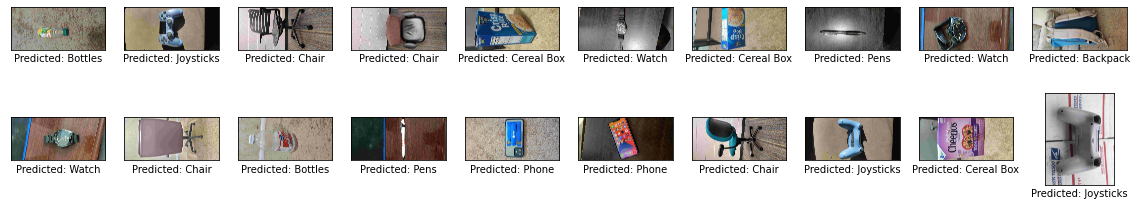

In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 10 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(validation_data)
for i, (image, label) in enumerate(validation_data.gen_dataset().unbatch().take(20)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          validation_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()


In [ ]:
#converting the model to TF lite format
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp4t_w1ga0/assets


INFO:tensorflow:Assets written to: /tmp/tmp4t_w1ga0/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmph2cyciqn/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmph2cyciqn/labels.txt.


In [ ]:
#Exporting the labels
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt.


INFO:tensorflow:Saving labels in ./labels.txt.


In [ ]:
#Evaluating the model
model.evaluate_tflite('model.tflite', train_data)

INFO:tensorflow:Processing example: #0
[[[[0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   ...
   [0.7921569  0.7254902  0.6627451 ]
   [0.7529412  0.6862745  0.62352943]
   [0.7064434  0.63977677 0.5770317 ]]

  [[0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   ...
   [0.7529412  0.6862745  0.62352943]
   [0.63529414 0.5686275  0.5058824 ]
   [0.7456591  0.67899245 0.61624736]]

  [[0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   ...
   [0.8051202  0.73845357 0.6757085 ]
   [0.59607846 0.5294118  0.46666667]
   [0.7443792  0.67771256 0.61496747]]

  ...

  [[0.87731504 0.87731504 0.87731504]
   [0.85490197 0.85490197 0.85490197]
   [0.7932732  0.8089595  0.7187634 ]
   ...
   [0.7697438  0.70307714 0.64033204]
   [0.7529412  0.6862745  0.62352943]
   [0.7137255  0.64705884 0.58431375]]

  [[0.

INFO:tensorflow:Processing example: #0
[[[[0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   ...
   [0.7921569  0.7254902  0.6627451 ]
   [0.7529412  0.6862745  0.62352943]
   [0.7064434  0.63977677 0.5770317 ]]

  [[0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   ...
   [0.7529412  0.6862745  0.62352943]
   [0.63529414 0.5686275  0.5058824 ]
   [0.7456591  0.67899245 0.61624736]]

  [[0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   [0.8156863  0.8156863  0.8156863 ]
   ...
   [0.8051202  0.73845357 0.6757085 ]
   [0.59607846 0.5294118  0.46666667]
   [0.7443792  0.67771256 0.61496747]]

  ...

  [[0.87731504 0.87731504 0.87731504]
   [0.85490197 0.85490197 0.85490197]
   [0.7932732  0.8089595  0.7187634 ]
   ...
   [0.7697438  0.70307714 0.64033204]
   [0.7529412  0.6862745  0.62352943]
   [0.7137255  0.64705884 0.58431375]]

  [[0.

{'accuracy': 1.0}